# Importing the datasets

In [80]:
import bs4 as bs
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  Fetching the data
##  Reading data from the source url

In [81]:
source = urllib.request.urlopen(r'https://people.sc.fsu.edu/~jburkardt/datasets/regression/x04.txt').read()

soup = bs.BeautifulSoup(source, 'lxml')

lines = soup.p.contents[0].split('\n')


## Removing the empty lines from the fetched data

In [85]:
try:
    lines.remove('')
except:
    pass

## Creating the dataset

In [86]:
l1 = []
noOfColumns = 0
noOfRows = 0
for line in lines:
  
    if line[0] == '#':    # avoiding all the lines stating with '#' character
        continue

    if line[0] != '#' and (noOfColumns==0 or noOfRows==0):    # fetching the number of rows and columns
        datalist = line.split(' ')

        if datalist[1] == 'columns':
            noOfColumns = int(datalist[0])
            col = 0

        elif datalist[1] == 'rows':
            noOfRows = int(datalist[0])
            row = 0

    elif line[0] != '#' and noOfColumns>0 and noOfRows>0:    # fetfching all the rows and columns in 1-dimentional array as a list
        datalist = line.strip().split()

        if col<noOfColumns:
            l1.append(' '.join(datalist))
            col += 1

        elif row<noOfRows:
            l1 += datalist
            row += 1
            
dataset = np.array([l1]).reshape((noOfRows+1,noOfColumns))    # Creating the dataset from the of shape(rows, columns) from the 1-D array with the coumns headers


## Printing the Dataset

In [87]:
print(dataset)

[['Index' 'Print Runs (x1000)' 'Page numbers' 'Orders (x1000)']
 ['1' '2800' '22' '437']
 ['2' '2670' '14' '204']
 ['3' '2800' '37' '725']
 ['4' '2784' '15' '279']
 ['5' '2800' '38' '474']
 ['6' '2620' '172' '1587']
 ['7' '2620' '249' '2630']
 ['8' '2470' '84' '798']
 ['9' '2620' '242' '2509']
 ['10' '2475' '100' '1192']
 ['11' '2620' '114' '882']
 ['12' '2620' '37' '511']
 ['13' '2448' '96' '896']
 ['14' '2648' '116' '1297']
 ['15' '2525' '94' '857']
 ['16' '1000' '47' '388']
 ['17' '980' '48' '462']
 ['18' '1000' '15' '67']
 ['19' '1112' '45' '326']
 ['20' '1000' '23' '145']
 ['21' '1000' '44' '298']
 ['22' '2188' '23' '179']
 ['23' '1028' '47' '289']
 ['24' '2200' '31' '200']
 ['25' '1000' '48' '461']
 ['26' '980' '48' '223']
 ['27' '728' '47' '235']
 ['28' '2510' '26' '235']
 ['29' '1500' '58' '594']
 ['30' '2500' '128' '1800']
 ['31' '2620' '120' '1457']
 ['32' '2528' '120' '1710']
 ['33' '2630' '121' '1715']
 ['34' '2550' '122' '1615']
 ['35' '1150' '61' '196']
 ['36' '1150' '50'

# Pre-processing of data
##  creating a pandas dataframe

In [88]:
df = pd.DataFrame(data=dataset[1:,1:],    # selecting all the rows and columns starting from 1st index location i.e. 2nd row and 2nd column as the data
                 index=dataset[1:,0],     # 1st column of the dataset is the index and the rows starting from 1st index location
                 columns=dataset[0,1:],   # ist row of the dataset is the column names it's the 0th row of the dataset
                 dtype = 'float64')

## let's have a look at the dataframe

In [89]:
print(df)

    Print Runs (x1000)  Page numbers  Orders (x1000)
1               2800.0          22.0           437.0
2               2670.0          14.0           204.0
3               2800.0          37.0           725.0
4               2784.0          15.0           279.0
5               2800.0          38.0           474.0
6               2620.0         172.0          1587.0
7               2620.0         249.0          2630.0
8               2470.0          84.0           798.0
9               2620.0         242.0          2509.0
10              2475.0         100.0          1192.0
11              2620.0         114.0           882.0
12              2620.0          37.0           511.0
13              2448.0          96.0           896.0
14              2648.0         116.0          1297.0
15              2525.0          94.0           857.0
16              1000.0          47.0           388.0
17               980.0          48.0           462.0
18              1000.0          15.0          

## fetching the Independent Variables and Dependent Variable

In [90]:
X = df.iloc[:,:2].values
y = df.iloc[:,2:].values

## splitting the data into training set and testing set

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### in the above case we have 2 Independent Variables so in this case the best model to be fit is Multi Linear Regressor
### The equation for the Multi Linear 
     y = b1*x1 + b2*x2

# Fitting the Multi Linear Regressor to the training set

In [92]:
from sklearn.linear_model import LinearRegression
multi_linear_regressor = LinearRegression()
multi_linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predicting the result of the regression

In [93]:
y_pred = multi_linear_regressor.predict(X_test)

In [94]:
print(y_pred)

[[ 1338.74044315]
 [  365.67446243]
 [  543.19350818]
 [ 1296.37102394]
 [ 1331.35111429]
 [  259.53551387]
 [ 2622.3330784 ]
 [  370.7948818 ]]


In [95]:
print(y_test)

[[ 1615.]
 [  263.]
 [  474.]
 [ 1297.]
 [ 1457.]
 [  235.]
 [ 2630.]
 [  235.]]


In [96]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.976201981992
92.8003383128
15817.2738378


# Visualization of the results
## Visualizing the training set results

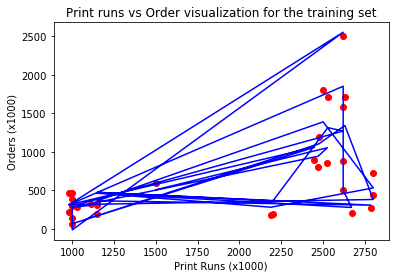

In [97]:
plt.scatter(X_train[:,0], y_train, color='red')
plt.plot(X_train[:,0], multi_linear_regressor.predict(X_train), color='blue')
plt.title('Print runs vs Order visualization for the training set')
plt.xlabel('{0}'.format(df.columns[0]))
plt.ylabel('{0}'.format(df.columns[2]))
plt.show()

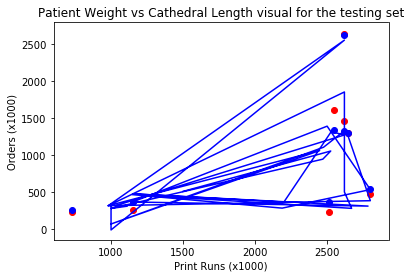

In [98]:
plt.scatter(X_test[:,0], y_test, color='red')
plt.scatter(X_test[:,0], y_pred, color='blue')
plt.plot(X_train[:,0], multi_linear_regressor.predict(X_train), color='blue')
plt.title('Patient Weight vs Cathedral Length visual for the testing set')
plt.xlabel('{0}'.format(df.columns[0]))
plt.ylabel('{0}'.format(df.columns[2]))
plt.show()

### It's seem like their is defienetly a problem with our training 

### Let's try to build our model using backward elimination

    backward elimination is kind of stepwise regression 
        their are three types of stewise regression methods, these are:

                 1. Forward selection
                 2. Backward Elimination
                 3. Bidirectional Elimination
           
    
    Here I'm going to introduce the Backward Elimination methods, 
    
        Backward elimination, which involves starting with all candidate variables, testing the deletion of each variable using a chosen model fit criterion, deleting the variable (if any) whose loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically significant loss of fit.
`source: *https://en.wikipedia.org/wiki/Stepwise_regression*
    
    Steps include in Backward Elimation methods are:
    
    Step 1: select a fit criteria with all the independent variables
    Step 2: fit the model with all the independent variables values 
    Step 3: choose the variable whose p value is the highest 
        if p value > fit critera 
        then
            remove the variable and fit the model with remaining variables and repeat the step 3 until p <= fir critera
        else 
        then 
            the model is ready 
    
    

In [99]:
import statsmodels.formula.api as sm
intercept = np.ones((X.shape[0], 1)).astype(int)
X = np.append(arr = intercept, values = X, axis = 1)
X_optimal = X[:, [0, 1, 2]]
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     238.1
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           4.18e-21
Time:                        16:25:14   Log-Likelihood:                -250.11
No. Observations:                  38   AIC:                             506.2
Df Residuals:                      35   BIC:                             511.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -364.8455     83.076     -4.392      0.000    -533.499    -196.192
x1             0.1833      0.043      4.298      0.000       0.097       0.270
x2            10.2639      0.575     17.840      0.000       9.096      11.432
==============================================================================
Omnibus:                        1.161   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                0.547
Skew:                           0.279   Prob(JB):                        0.761
Kurtosis:                       3.188   Cond. No.                     5.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Let's try to fit our model without x1 i.e. print runs though it is an important variable but still I have to test that what will be the impact of it on my model 

In [100]:
X_opt = X[:, [0, 2]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     308.1
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           3.13e-19
Time:                        16:25:19   Log-Likelihood:                -258.16
No. Observations:                  38   AIC:                             520.3
Df Residuals:                      36   BIC:                             523.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -76.0962     59.571     -1.277      0.210    -196.912      44.719
x1            11.2620      0.642     17.554      0.000       9.961      12.563
==============================================================================
Omnibus:                        1.714   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.630
Skew:                           0.450   Prob(JB):                        0.443
Kurtosis:                       2.529   Cond. No.                         154.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Let's try removing the constat term as well

In [101]:
X_opt = X[:, [ 2]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     736.9
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           4.97e-26
Time:                        16:25:32   Log-Likelihood:                -259.00
No. Observations:                  38   AIC:                             520.0
Df Residuals:                      37   BIC:                             521.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.6088      0.391     27.145      0.000       9.817      11.401
==============================================================================
Omnibus:                        2.401   Durbin-Watson:                   1.113
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                2.098
Skew:                           0.562   Prob(JB):                        0.350
Kurtosis:                       2.753   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### considering the R-Square value which is very less in case of page no only let's try to train the model agian and then look at  predictions

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#  Predicting the new values

In [103]:
y_pred_2 = regressor.predict(X_test)

In [104]:
print(y_pred_2)

[[  468.56276878]
 [ 1365.48914166]
 [  479.63593388]
 [  468.56276878]
 [  357.83111781]
 [  435.34327349]
 [  468.56276878]
 [ 1210.46483029]]


In [105]:
print(y_test)

[[  289.]
 [ 1800.]
 [  462.]
 [  388.]
 [  511.]
 [  298.]
 [  235.]
 [  882.]]


In [106]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
print(r2_score(y_test, y_pred_2))
print(mean_absolute_error(y_test, y_pred_2))
print(mean_squared_error(y_test, y_pred_2))

0.773746842502
195.601510569
54076.0565972


# Visualization of results
## VIsualization of training set

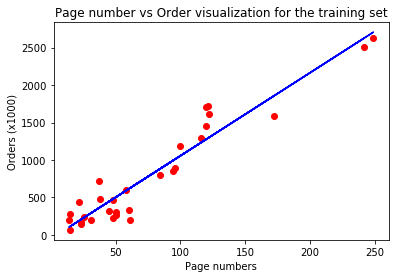

In [107]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Page number vs Order visualization for the training set')
plt.xlabel('{0}'.format(df.columns[1]))
plt.ylabel('{0}'.format(df.columns[2]))
plt.show()

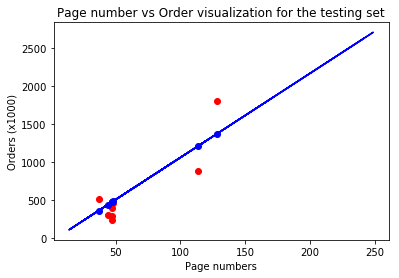

In [108]:
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_test, y_pred_2, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Page number vs Order visualization for the testing set')
plt.xlabel('{0}'.format(df.columns[1]))
plt.ylabel('{0}'.format(df.columns[2]))
plt.show()